In [0]:
# Eric Rodgers
# Lab 3
# Class IST-718
# Professor Fox

In [0]:
import pandas as pd
import numpy as np
import os
# Pretty data tables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# For viewing entire dataframe
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', 199) 

In [82]:
from google.colab import files
uploaded = files.upload()

Saving Coaches9.csv to Coaches9.csv
Saving GSR & FSR Endowment.csv to GSR & FSR Endowment.csv
Saving Records.csv to Records.csv
Saving Stadiums.csv to Stadiums.csv


# **Coaches Data Set**

In [83]:
# Read the data in as pandas data frame 
coaches_org = pd.read_csv('Coaches9.csv')
# Copy the data
coaches = coaches_org.copy()
# Check data types
coaches.dtypes

# Show how many rows and the object type
coaches['SchoolPay'].apply(type).value_counts()
coaches['TotalPay'].apply(type).value_counts()
coaches['Bonus'].apply(type).value_counts()
coaches['BonusPaid'].apply(type).value_counts()
coaches['Buyout'].apply(type).value_counts()

School                 object
Conference             object
Coach                  object
Graduated from NCAA    object
SchoolPay              object
TotalPay               object
Bonus                  object
BonusPaid              object
AssistantPay           object
Buyout                 object
dtype: object

<class 'str'>    129
Name: SchoolPay, dtype: int64

<class 'str'>    129
Name: TotalPay, dtype: int64

<class 'str'>    129
Name: Bonus, dtype: int64

<class 'str'>    129
Name: BonusPaid, dtype: int64

<class 'str'>    129
Name: Buyout, dtype: int64

In [84]:
# Columns are seen as objects and individual columns seen as strings. Most likely due to the commas. 

# Clean out double dashes (--) in all cost columns 
coaches['SchoolPay'] = np.where((coaches.SchoolPay == '--'),'0',coaches.SchoolPay)
coaches['TotalPay'] = np.where((coaches.TotalPay == '--'),'0',coaches.TotalPay)
coaches['Bonus'] = np.where((coaches.Bonus == '--'),'0',coaches.Bonus)
coaches['BonusPaid'] = np.where((coaches.BonusPaid == '--'),'0',coaches.BonusPaid)
coaches['Buyout'] = np.where((coaches.Buyout == '--'),'0',coaches.Buyout)
coaches

,School,Conference,Coach,Graduated from NCAA,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,YES,885000,885000,247000,0,$0,0
1,Akron,MAC,Terry Bowden,YES,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,YES,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,NO,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,YES,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
5,Arizona,Pac-12,Kevin Sumlin,YES,"$1,600,000","$2,000,000","$2,025,000",0,$0,"$10,000,000"
6,Arizona State,Pac-12,Herm Edwards,YES,"$2,000,000","$2,000,000","$3,010,000",0,$0,"$8,166,667"
7,Arkansas,SEC,Chad Morris,YES,"$3,500,000","$3,500,000","$1,000,000",0,$0,"$12,500,000"
8,Arkansas State,Sun Belt,Blake Anderson,YES,"$825,000","$825,000","$185,000","$25,000",$0,"$300,000"
9,Army,Ind.,Jeff Monken,NO,932521,932521,0,0,$0,0


In [0]:
# Borrowed Code from net
# Link is here https://pbpython.com/currency-cleanup.html

def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [86]:
coaches['SchoolPay'] = coaches['SchoolPay'].apply(clean_currency).astype('int')
coaches['TotalPay'] = coaches['TotalPay'].apply(clean_currency).astype('int')
coaches['Bonus'] = coaches['Bonus'].apply(clean_currency).astype('int')
coaches['BonusPaid'] = coaches['BonusPaid'].apply(clean_currency).astype('int')
coaches['AssistantPay'] = coaches['AssistantPay'].apply(clean_currency).astype('int')
coaches['Buyout'] = coaches['Buyout'].apply(clean_currency).astype('int')
coaches
# End of borrowing
# Everything converted over correctly
coaches.dtypes

,School,Conference,Coach,Graduated from NCAA,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,YES,885000,885000,247000,0,0,0
1,Akron,MAC,Terry Bowden,YES,411000,412500,225000,50000,0,688500
2,Alabama,SEC,Nick Saban,YES,8307000,8307000,1100000,500000,0,33600000
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,900000,950000,165471,0,3847500
4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,712500,295000,145000,0,2160417
5,Arizona,Pac-12,Kevin Sumlin,YES,1600000,2000000,2025000,0,0,10000000
6,Arizona State,Pac-12,Herm Edwards,YES,2000000,2000000,3010000,0,0,8166667
7,Arkansas,SEC,Chad Morris,YES,3500000,3500000,1000000,0,0,12500000
8,Arkansas State,Sun Belt,Blake Anderson,YES,825000,825000,185000,25000,0,300000
9,Army,Ind.,Jeff Monken,NO,932521,932521,0,0,0,0


School                 object
Conference             object
Coach                  object
Graduated from NCAA    object
SchoolPay               int64
TotalPay                int64
Bonus                   int64
BonusPaid               int64
AssistantPay            int64
Buyout                  int64
dtype: object

In [87]:
# Quick check of total pay across df
# more of a sanity check all numbers are calculating correctly
School_Pay = sum(coaches['SchoolPay'])
School_Pay

301287589

**Stadium Data (Capacity)**

In [88]:
import io
# Data on stadium sizes
# https://www.collegegridirons.com/comparisons-by-capacity/
# Read the data in as pandas data frame 
stadium_org = pd.read_csv('Stadiums.csv')
# Copy the data
stadium = stadium_org.copy()
stadium.head()
stadium.dtypes

,Unnamed: 0,College,Conference,Capacity,Opened
0,Stadium,Air Force,Mountain West,"52,237",1962
1,Falcon Stadium,Akron,MAC,"30,000",2009
2,InfoCision Stadium,Alabama,SEC,"101,821",1929
3,Bryant Denny Stadium,Appalachian State,Sun Belt,"24,150",1962
4,Kidd Brewer Stadium,Arizona,Pac 12,"56,037",1928


Unnamed: 0    object
College       object
Conference    object
Capacity      object
Opened         int64
dtype: object

In [89]:
#Convert capacity to an integer
stadium["Capacity"] = stadium["Capacity"].str.replace(",","").astype(int)
stadium.head()

,Unnamed: 0,College,Conference,Capacity,Opened
0,Stadium,Air Force,Mountain West,52237,1962
1,Falcon Stadium,Akron,MAC,30000,2009
2,InfoCision Stadium,Alabama,SEC,101821,1929
3,Bryant Denny Stadium,Appalachian State,Sun Belt,24150,1962
4,Kidd Brewer Stadium,Arizona,Pac 12,56037,1928


In [90]:
# Not needed anymore. Too many changes were necessary. CSV file change was easier. 
# Change columns so College columns will match
# stadium['College'] = np.where((stadium.College == 'SMU'),'Southern Methodist',stadium.College)
# stadium['College'] = np.where((stadium.College == 'Miami-OH'),'Miami (Ohio)',stadium.College)
# Rename Column College to School to Match the Coach csv
stadium.rename(columns={'College': 'School'}, inplace=True)
stadium.head()

,Unnamed: 0,School,Conference,Capacity,Opened
0,Stadium,Air Force,Mountain West,52237,1962
1,Falcon Stadium,Akron,MAC,30000,2009
2,InfoCision Stadium,Alabama,SEC,101821,1929
3,Bryant Denny Stadium,Appalachian State,Sun Belt,24150,1962
4,Kidd Brewer Stadium,Arizona,Pac 12,56037,1928


In [91]:
# Merge Dataframes
coaches = coaches.merge(stadium, on='School', how='left')
coaches.head()

,School,Conference_x,Coach,Graduated from NCAA,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Unnamed: 0,Conference_y,Capacity,Opened
0,Air Force,Mt. West,Troy Calhoun,YES,885000,885000,247000,0,0,0,Stadium,Mountain West,52237,1962
1,Akron,MAC,Terry Bowden,YES,411000,412500,225000,50000,0,688500,Falcon Stadium,MAC,30000,2009
2,Alabama,SEC,Nick Saban,YES,8307000,8307000,1100000,500000,0,33600000,InfoCision Stadium,SEC,101821,1929
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,900000,950000,165471,0,3847500,Skelly Field,CUSA,71594,1927
4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,712500,295000,145000,0,2160417,Bryant Denny Stadium,Sun Belt,24150,1962


In [92]:
# Drop unnecessary columns
coaches = coaches.drop(["SchoolPay", "Bonus" , "BonusPaid", "AssistantPay", "Buyout", "Unnamed: 0", "Conference_y", "Opened" ], axis = 1)
coaches.head()

,School,Conference_x,Coach,Graduated from NCAA,TotalPay,Capacity
0,Air Force,Mt. West,Troy Calhoun,YES,885000,52237
1,Akron,MAC,Terry Bowden,YES,412500,30000
2,Alabama,SEC,Nick Saban,YES,8307000,101821
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,71594
4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,24150


In [93]:
# Quick check of Capcity on a School
# more of a sanity check all numbers are calculating correctly
# verified off of csv (Stadiums)
alabama =  coaches['School']=='Alabama'
stadium_check = coaches[alabama]
stadium_check.head()

,School,Conference_x,Coach,Graduated from NCAA,TotalPay,Capacity
2,Alabama,SEC,Nick Saban,YES,8307000,101821


In [94]:
# Check for NA
coaches.isnull().values.any()
# Yay no NA!!!

False

## **Stadiums and Coaches Combined** 



# **# Add in the FSR, GSR, Endowment dataframe to Combine with the Coaches Data Frame**





In [95]:
# Data from NCAA website for GSR and FSR Data
# https://web3.ncaa.org/aprsearch/gsrsearch
# Filtered on 2006 Cohort for Football only
# Added endowment from simple wiki search for each school. Yes for EACH school!
fsr_gsr_endowment_org = pd.read_csv('GSR & FSR Endowment.csv')
# Copy the data
fsr_gsr_endowment = fsr_gsr_endowment_org.copy()
fsr_gsr_endowment.head()
fsr_gsr_endowment.dtypes

,School,GSR - 2006,FSR - 2006,Endowment
0,Air Force,93,60,"$47,000,000"
1,Akron,58,52,"$221,000,000"
2,Alabama,73,57,"$1,520,000,000"
3,Alabama at Birmingham,60,55,"$495,300,000"
4,Appalachian State,68,56,"$122,400,000"


School        object
GSR - 2006     int64
FSR - 2006     int64
Endowment     object
dtype: object

In [96]:
# Take away the dashes in Endowment. This represents schools without Endowments. 
fsr_gsr_endowment['Endowment'] = np.where((fsr_gsr_endowment.Endowment == '-'),'0',fsr_gsr_endowment.Endowment)
# Capacity is coming up as an object, need to convert it to an integer
fsr_gsr_endowment['Endowment'] = fsr_gsr_endowment['Endowment'].apply(clean_currency).astype('int')
# Then to check if it worked
fsr_gsr_endowment.dtypes

School        object
GSR - 2006     int64
FSR - 2006     int64
Endowment      int64
dtype: object

In [0]:
# Merge Dataframes (Coaches to FSR GSR Endowment Data Frame)
coaches = coaches.merge(fsr_gsr_endowment, on='School', how='left')

# Add in the Records data to Coaches Data Frame by School


In [98]:
# Data from NCAA website for the win loss records
# https://www.ncaa.com/standings/football/fbs
# filtered on 2019 records
# Added endowment from simple wiki search for each school. Yes for EACH school!
records_org = pd.read_csv('Records.csv')
# Copy the data
records = records_org.copy()
records.head()
records.dtypes

,School,Overall Wins,Overall Losses,Winning Percentage
0,Air Force,11,2,84.62%
1,Akron,0,12,0.00%
2,Alabama,11,2,84.62%
3,Alabama at Birmingham,9,5,64.29%
4,Appalachian State,13,1,92.86%


School                object
Overall Wins           int64
Overall Losses         int64
Winning Percentage    object
dtype: object

In [99]:
records['Winning Percentage'] = records['Winning Percentage'].str.rstrip('%').astype('float') / 1
records.head()
records.dtypes

,School,Overall Wins,Overall Losses,Winning Percentage
0,Air Force,11,2,84.62
1,Akron,0,12,0.00
2,Alabama,11,2,84.62
3,Alabama at Birmingham,9,5,64.29
4,Appalachian State,13,1,92.86


School                 object
Overall Wins            int64
Overall Losses          int64
Winning Percentage    float64
dtype: object

In [100]:
# Borrowed code from https://stackoverflow.com/questions/26133538/round-a-single-column-in-pandas
# Need to round up before converting to integer
decimals = 0
records['Winning Percentage'] = [round(x, decimals) for x in records['Winning Percentage']]
# Convert float to int
records['Winning Percentage'] = records['Winning Percentage'].apply(np.int64)
records.head()

,School,Overall Wins,Overall Losses,Winning Percentage
0,Air Force,11,2,85
1,Akron,0,12,0
2,Alabama,11,2,85
3,Alabama at Birmingham,9,5,64
4,Appalachian State,13,1,93


In [101]:
# Merge Dataframes (Coaches to Records Data Frame)
coaches = coaches.merge(records, on = 'School', how='left')
coaches = coaches.rename(columns = {'Conference_x':'Conference'})
coaches = coaches.rename(columns = {'Graduated from NCAA':'GraduatedfromNCAA'})
coaches

,School,Conference,Coach,GraduatedfromNCAA,TotalPay,Capacity,GSR - 2006,FSR - 2006,Endowment,Overall Wins,Overall Losses,Winning Percentage
0,Air Force,Mt. West,Troy Calhoun,YES,885000,52237,93,60,47000000,11,2,85
1,Akron,MAC,Terry Bowden,YES,412500,30000,58,52,221000000,0,12,0
2,Alabama,SEC,Nick Saban,YES,8307000,101821,73,57,1520000000,11,2,85
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,71594,60,55,495300000,9,5,64
4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,24150,68,56,122400000,13,1,93
5,Arizona,Pac-12,Kevin Sumlin,YES,2000000,56037,61,59,1038000000,4,8,33
6,Arizona State,Pac-12,Herm Edwards,YES,2000000,56232,67,52,922100000,8,5,62
7,Arkansas,SEC,Chad Morris,YES,3500000,72000,54,39,1220000000,2,10,17
8,Arkansas State,Sun Belt,Blake Anderson,YES,825000,30964,68,60,54900000,8,5,62
9,Army,Ind.,Jeff Monken,NO,932521,38000,89,54,0,5,8,38


In [107]:
#Need to delete 0's which come from no endowment found or no total pay numbers being available for some schools
coaches = coaches[coaches.Endowment > 1]
coaches = coaches[coaches.TotalPay > 1]
coaches.reset_index()
coaches

,index,School,Conference,Coach,GraduatedfromNCAA,TotalPay,Capacity,GSR - 2006,FSR - 2006,Endowment,Overall Wins,Overall Losses,Winning Percentage
0,0,Air Force,Mt. West,Troy Calhoun,YES,885000,52237,93,60,47000000,11,2,85
1,1,Akron,MAC,Terry Bowden,YES,412500,30000,58,52,221000000,0,12,0
2,2,Alabama,SEC,Nick Saban,YES,8307000,101821,73,57,1520000000,11,2,85
3,3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,71594,60,55,495300000,9,5,64
4,4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,24150,68,56,122400000,13,1,93
5,5,Arizona,Pac-12,Kevin Sumlin,YES,2000000,56037,61,59,1038000000,4,8,33
6,6,Arizona State,Pac-12,Herm Edwards,YES,2000000,56232,67,52,922100000,8,5,62
7,7,Arkansas,SEC,Chad Morris,YES,3500000,72000,54,39,1220000000,2,10,17
8,8,Arkansas State,Sun Belt,Blake Anderson,YES,825000,30964,68,60,54900000,8,5,62
9,10,Auburn,SEC,Gus Malzahn,NO,6705656,87451,70,61,793000000,9,4,69


,School,Conference,Coach,GraduatedfromNCAA,TotalPay,Capacity,GSR - 2006,FSR - 2006,Endowment,Overall Wins,Overall Losses,Winning Percentage
0,Air Force,Mt. West,Troy Calhoun,YES,885000,52237,93,60,47000000,11,2,85
1,Akron,MAC,Terry Bowden,YES,412500,30000,58,52,221000000,0,12,0
2,Alabama,SEC,Nick Saban,YES,8307000,101821,73,57,1520000000,11,2,85
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,71594,60,55,495300000,9,5,64
4,Appalachian State,Sun Belt,Scott Satterfield,YES,712500,24150,68,56,122400000,13,1,93
5,Arizona,Pac-12,Kevin Sumlin,YES,2000000,56037,61,59,1038000000,4,8,33
6,Arizona State,Pac-12,Herm Edwards,YES,2000000,56232,67,52,922100000,8,5,62
7,Arkansas,SEC,Chad Morris,YES,3500000,72000,54,39,1220000000,2,10,17
8,Arkansas State,Sun Belt,Blake Anderson,YES,825000,30964,68,60,54900000,8,5,62
10,Auburn,SEC,Gus Malzahn,NO,6705656,87451,70,61,793000000,9,4,69


# Visuals

In [104]:
# Borrowed code from 
# https://plotly.com/python/box-plots/
import plotly.express as px
# subset coaches data
capbycon = coaches[['Conference', 'Capacity']]
# Plot
fig = px.box(capbycon, x = "Conference", y = "Capacity", points = "all")
fig.show()

In [108]:
# subset coaches data
avg_totalpaybycon = coaches[['Conference', 'TotalPay']]
# Took out the schools with 0 for Total Pay
avg_totalpaybycon = avg_totalpaybycon[(avg_totalpaybycon.TotalPay > 0)]
# Plot
fig = px.box(avg_totalpaybycon, x = "Conference", y = "TotalPay", points = "all")
fig.show()


In [26]:
# subset coaches data
avg_endow_byconf = coaches[['Conference', 'Endowment']]
# Plot
fig = px.bar(avg_endow_byconf, x = 'Conference', y = 'Endowment',
             #hover_data=['lifeExp', 'gdpPercap'], 
             color='Endowment',
             labels={'average endowment by conference'}, height=400)
fig.show()

GraduatedfromNCAA  Conference
NO                 AAC            4
                   ACC            7
                   Big 12         5
                   Big Ten        2
                   C-USA          3
                   Ind.           2
                   MAC            5
                   Mt. West       1
                   Pac-12         2
                   SEC            4
                   Sun Belt       2
YES                AAC            7
                   ACC            7
                   Big 12         5
                   Big Ten       12
                   C-USA         11
                   Ind.           4
                   MAC            7
                   Mt. West      11
                   Pac-12        10
                   SEC           10
                   Sun Belt       8
Name: GraduatedfromNCAA, dtype: int64

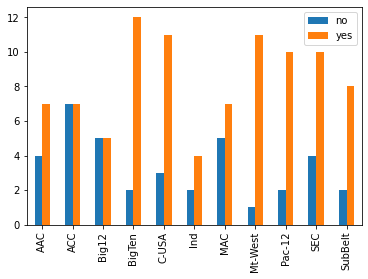

In [27]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html
coach_grad = coaches[['GraduatedfromNCAA', 'Conference']]
coach_grad = coach_grad.groupby(['GraduatedfromNCAA', 'Conference'])['GraduatedfromNCAA'].count()
coach_grad

#Manual plot out of frustration.
# Data provided by groupby though!
no = [4,7,5,2,3,2,5,1,2,4,2]
yes = [7,7,5,12,11,4,7,11,10,10,8]
index = ['AAC', 'ACC', 'Big12',
         'BigTen', 'C-USA', 'Ind', 'MAC', 'Mt-West', 'Pac-12',
         'SEC','SubBelt']
df = pd.DataFrame({'no': no,
                   'yes': yes}, index=index)
ax = df.plot.bar(rot=90)

In [28]:
# subset coaches data
stadiumbyendowment = coaches[['School','Endowment', 'Conference', 'Capacity']]

fig = px.scatter(stadiumbyendowment, x = "Capacity", y = "Endowment", color = "Conference",
                 size = 'Endowment', hover_data=['Conference'])
fig.update_layout(
    title = "Capacity and Endowments - Is there a relationship? ",
)


,School,Endowment,Conference,Capacity
0,Air Force,47000000,Mt. West,52237
1,Akron,221000000,MAC,30000
2,Alabama,1520000000,SEC,101821
3,Alabama at Birmingham,495300000,C-USA,71594
4,Appalachian State,122400000,Sun Belt,24150


In [110]:
# Borrowed code from 
# https://plotly.com/python/line-and-scatter/

import plotly.express as px

# subset coaches data
gradesandendowment = coaches[['GSR - 2006','FSR - 2006', 'Endowment', 'Conference']]
# Need to delete 0's which come from no endowment found for some schools
gradesandendowment = gradesandendowment[gradesandendowment.Endowment > 1]

#Plot 
gradesandendowment = gradesandendowment.rename(columns = {'GSR - 2006':'GSR'})
gradesandendowment = gradesandendowment.rename(columns = {'FSR - 2006':'FSR'})
fig = px.scatter(gradesandendowment, x = "GSR", y = "FSR", color = "Conference",
                 size = 'Endowment', hover_data=['Conference'])
fig.update_layout(
    title="GSR & FSR Scores Across Endowment Amounts",
)

In [30]:
# Borrowed code from 
# https://plotly.com/python/line-and-scatter/

import plotly.express as px

# subset coaches data
winlossacross_endowments = coaches[['Endowment','Overall Wins', 'Overall Losses', 'Conference']]
# Need to delete 0's which come from no endowment found for some schools
winlossacross_endowments = winlossacross_endowments[winlossacross_endowments.Endowment > 1]

#Plot 
fig = px.scatter(winlossacross_endowments, x = "Overall Wins", y = "Overall Losses", color = "Conference",
                 size = 'Endowment', hover_data=['Conference'])
fig.update_layout(
    title="Total Wins and Losses Across Endowment Amounts",
)

# MODELS



In [112]:
# Need to delete 0's which come from no endowment found for some schools
# Rename a few columns
coaches = coaches.rename(columns = {'GSR - 2006':'GSR'})
coaches = coaches.rename(columns = {'FSR - 2006':'FSR'})
coaches = coaches.rename(columns = {'Overall Wins':'Total_Wins'})
coaches = coaches.rename(columns = {'Overall Losses':'Total_Losses'})
coaches = coaches[coaches.Endowment > 1]
coaches = coaches[coaches.TotalPay > 1]
coaches = coaches[coaches.Total_Wins > 1]
coaches = coaches[coaches.Total_Losses > 1]
coaches

,School,Conference,Coach,GraduatedfromNCAA,TotalPay,Capacity,GSR,FSR,Endowment,Total_Wins,Total_Losses,Winning Percentage,runiform
0,Air Force,Mt. West,Troy Calhoun,YES,885000,52237,93,60,47000000,11,2,85,0.191519
2,Alabama,SEC,Nick Saban,YES,8307000,101821,73,57,1520000000,11,2,85,0.437728
3,Alabama at Birmingham,C-USA,Bill Clark,NO,900000,71594,60,55,495300000,9,5,64,0.785359
5,Arizona,Pac-12,Kevin Sumlin,YES,2000000,56037,61,59,1038000000,4,8,33,0.272593
6,Arizona State,Pac-12,Herm Edwards,YES,2000000,56232,67,52,922100000,8,5,62,0.276464
7,Arkansas,SEC,Chad Morris,YES,3500000,72000,54,39,1220000000,2,10,17,0.801872
8,Arkansas State,Sun Belt,Blake Anderson,YES,825000,30964,68,60,54900000,8,5,62,0.958139
10,Auburn,SEC,Gus Malzahn,NO,6705656,87451,70,61,793000000,9,4,69,0.875933
11,Ball State,MAC,Mike Neu,YES,435689,22500,60,54,212800000,5,7,42,0.357817
13,Boise State,Mt. West,Bryan Harsin,YES,1650010,37000,91,67,115000000,12,2,86,0.500995


In [117]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on just conference
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference a Team is in on a Coaches Salary: ',\
    round(my_model_fit.params[1],0))


Proportion of Test Set Variance Accounted for:  0.604
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     23.66
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.78e-22
Time:                        03:08:18   Log-Likelihood:                -1736.4
No. Observations:                 114   AIC:                             3495.
Df Residuals:                     103   BIC:                             3525.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [34]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + Endowment')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on conference and endowmment
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference and the Endowment the school receives on a Coaches Salary: ',\
    round(my_model_fit.params[2],0))


Proportion of Test Set Variance Accounted for:  0.636
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     24.22
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.01e-23
Time:                        20:21:57   Log-Likelihood:                -1731.2
No. Observations:                 114   AIC:                             3486.
Df Residuals:                     102   BIC:                             3519.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [36]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + GraduatedfromNCAA')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on conference and whether a coach graduated from an NCAA college
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference and whether a coach graduated from an NCAA College on a Coaches Salary: ',\
    round(my_model_fit.params[2],0))


Proportion of Test Set Variance Accounted for:  0.607
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     21.52
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           6.27e-22
Time:                        20:21:57   Log-Likelihood:                -1736.0
No. Observations:                 114   AIC:                             3496.
Df Residuals:                     102   BIC:                             3529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [38]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + Capacity')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on conference and stadium capacity 
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference and the Capacity of the Schools Stadium on a Coaches Salary: ',\
    round(my_model_fit.params[2],0))


Proportion of Test Set Variance Accounted for:  0.768
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     33.50
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           5.49e-29
Time:                        20:21:57   Log-Likelihood:                -1717.2
No. Observations:                 114   AIC:                             3458.
Df Residuals:                     102   BIC:                             3491.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [40]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + GSR + FSR')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on conference and endowmment
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference and the Capacity of the Schools Stadium on a Coaches Salary: ',\
    round(my_model_fit.params[3],0))


Proportion of Test Set Variance Accounted for:  0.527
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     20.00
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.35e-21
Time:                        20:21:57   Log-Likelihood:                -1735.0
No. Observations:                 114   AIC:                             3496.
Df Residuals:                     101   BIC:                             3532.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [44]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + Total_Wins + Total_Losses')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on conference and endowmment
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of the Conference and the 2019 W-L Record of the College on a Coaches Salary: ',\
    round(my_model_fit.params[3],0))


Proportion of Test Set Variance Accounted for:  0.643
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     24.69
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           8.03e-25
Time:                        20:21:57   Log-Likelihood:                -1726.3
No. Observations:                 114   AIC:                             3479.
Df Residuals:                     101   BIC:                             3514.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [113]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + Capacity + Endowment + GraduatedfromNCAA + Total_Wins + Total_Losses + FSR + GSR')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on all variables
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of all variales on a Coaches Salary: ',\
    round(my_model_fit.params[8],0))


Proportion of Test Set Variance Accounted for:  0.76
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.63e-28
Time:                        02:34:10   Log-Likelihood:                -1706.2
No. Observations:                 114   AIC:                             3448.
Df Residuals:                      96   BIC:                             3498.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [119]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(coaches))
coaches_train = coaches[coaches['runiform'] >= 0.33]
coaches_test = coaches[coaches['runiform'] < 0.33]
# check training data frame
print('\ncoaches_train data frame (rows, columns): ',coaches_train.shape)
print(coaches_train.head())
# check test data frame
print('\ncoaches_test data frame (rows, columns): ',coaches_test.shape)
print(coaches_test.head())

# specify a simple model with bobblehead entered last
my_model = str('TotalPay ~ Conference + Capacity + Endowment')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = coaches_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
coaches_train['predict_salary'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
coaches_test['predict_salary'] = train_model_fit.predict(coaches_test)


coaches_train data frame (rows, columns):  (82, 13)
                   School Conference         Coach GraduatedfromNCAA  \
2                 Alabama        SEC    Nick Saban               YES   
3   Alabama at Birmingham      C-USA    Bill Clark                NO   
5                 Arizona     Pac-12  Kevin Sumlin               YES   
6           Arizona State     Pac-12  Herm Edwards               YES   
10                 Auburn        SEC   Gus Malzahn                NO   

    TotalPay  Capacity  GSR  FSR   Endowment  Total_Wins  Total_Losses  \
2    8307000    101821   73   57  1520000000          11             2   
3     900000     71594   60   55   495300000           9             5   
5    2000000     56037   61   59  1038000000           4             8   
6    2000000     56232   67   52   922100000           8             5   
10   6705656     87451   70   61   793000000           9             4   

    Winning Percentage  runiform  
2                   85  0.622109  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(coaches_test['TotalPay'].corr(coaches_test['predict_salary']),2),3))

# use the full data set to obtain an estimate of the increase in
# salary changes based on all variables
my_model_fit = smf.ols(my_model, data = coaches).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of endowment and stadium capacity have on a Coaches Salary: ',\
    round(my_model_fit.params[2],0))


Proportion of Test Set Variance Accounted for:  0.779
                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     33.09
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.21e-29
Time:                        04:08:14   Log-Likelihood:                -1713.4
No. Observations:                 114   AIC:                             3453.
Df Residuals:                     101   BIC:                             3488.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------